## Heart Disease Prediction Project
Kyla Arynda


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [12]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


## Exploring Dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


### Exploratory Data Analysis (EDA)

Proses analisa data dengan tujuan memahami struktur, pola, dan hubungan antara variabel-variabel dalam data. EDA digunakan untuk mendapatkan wawasan tentang data sebelum melakukan analisis yang lebih lanjut atau membangun model prediktif. Proses ini mencakup teknik statistik deskriptif dan visualisasi data

In [22]:
describe_stats = df.describe().T
describe_stats

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


In [52]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [54]:
df.shape

(1190, 12)

In [56]:
print(f"NaN values : {df.isnull().sum().sum()}")

NaN values : 0


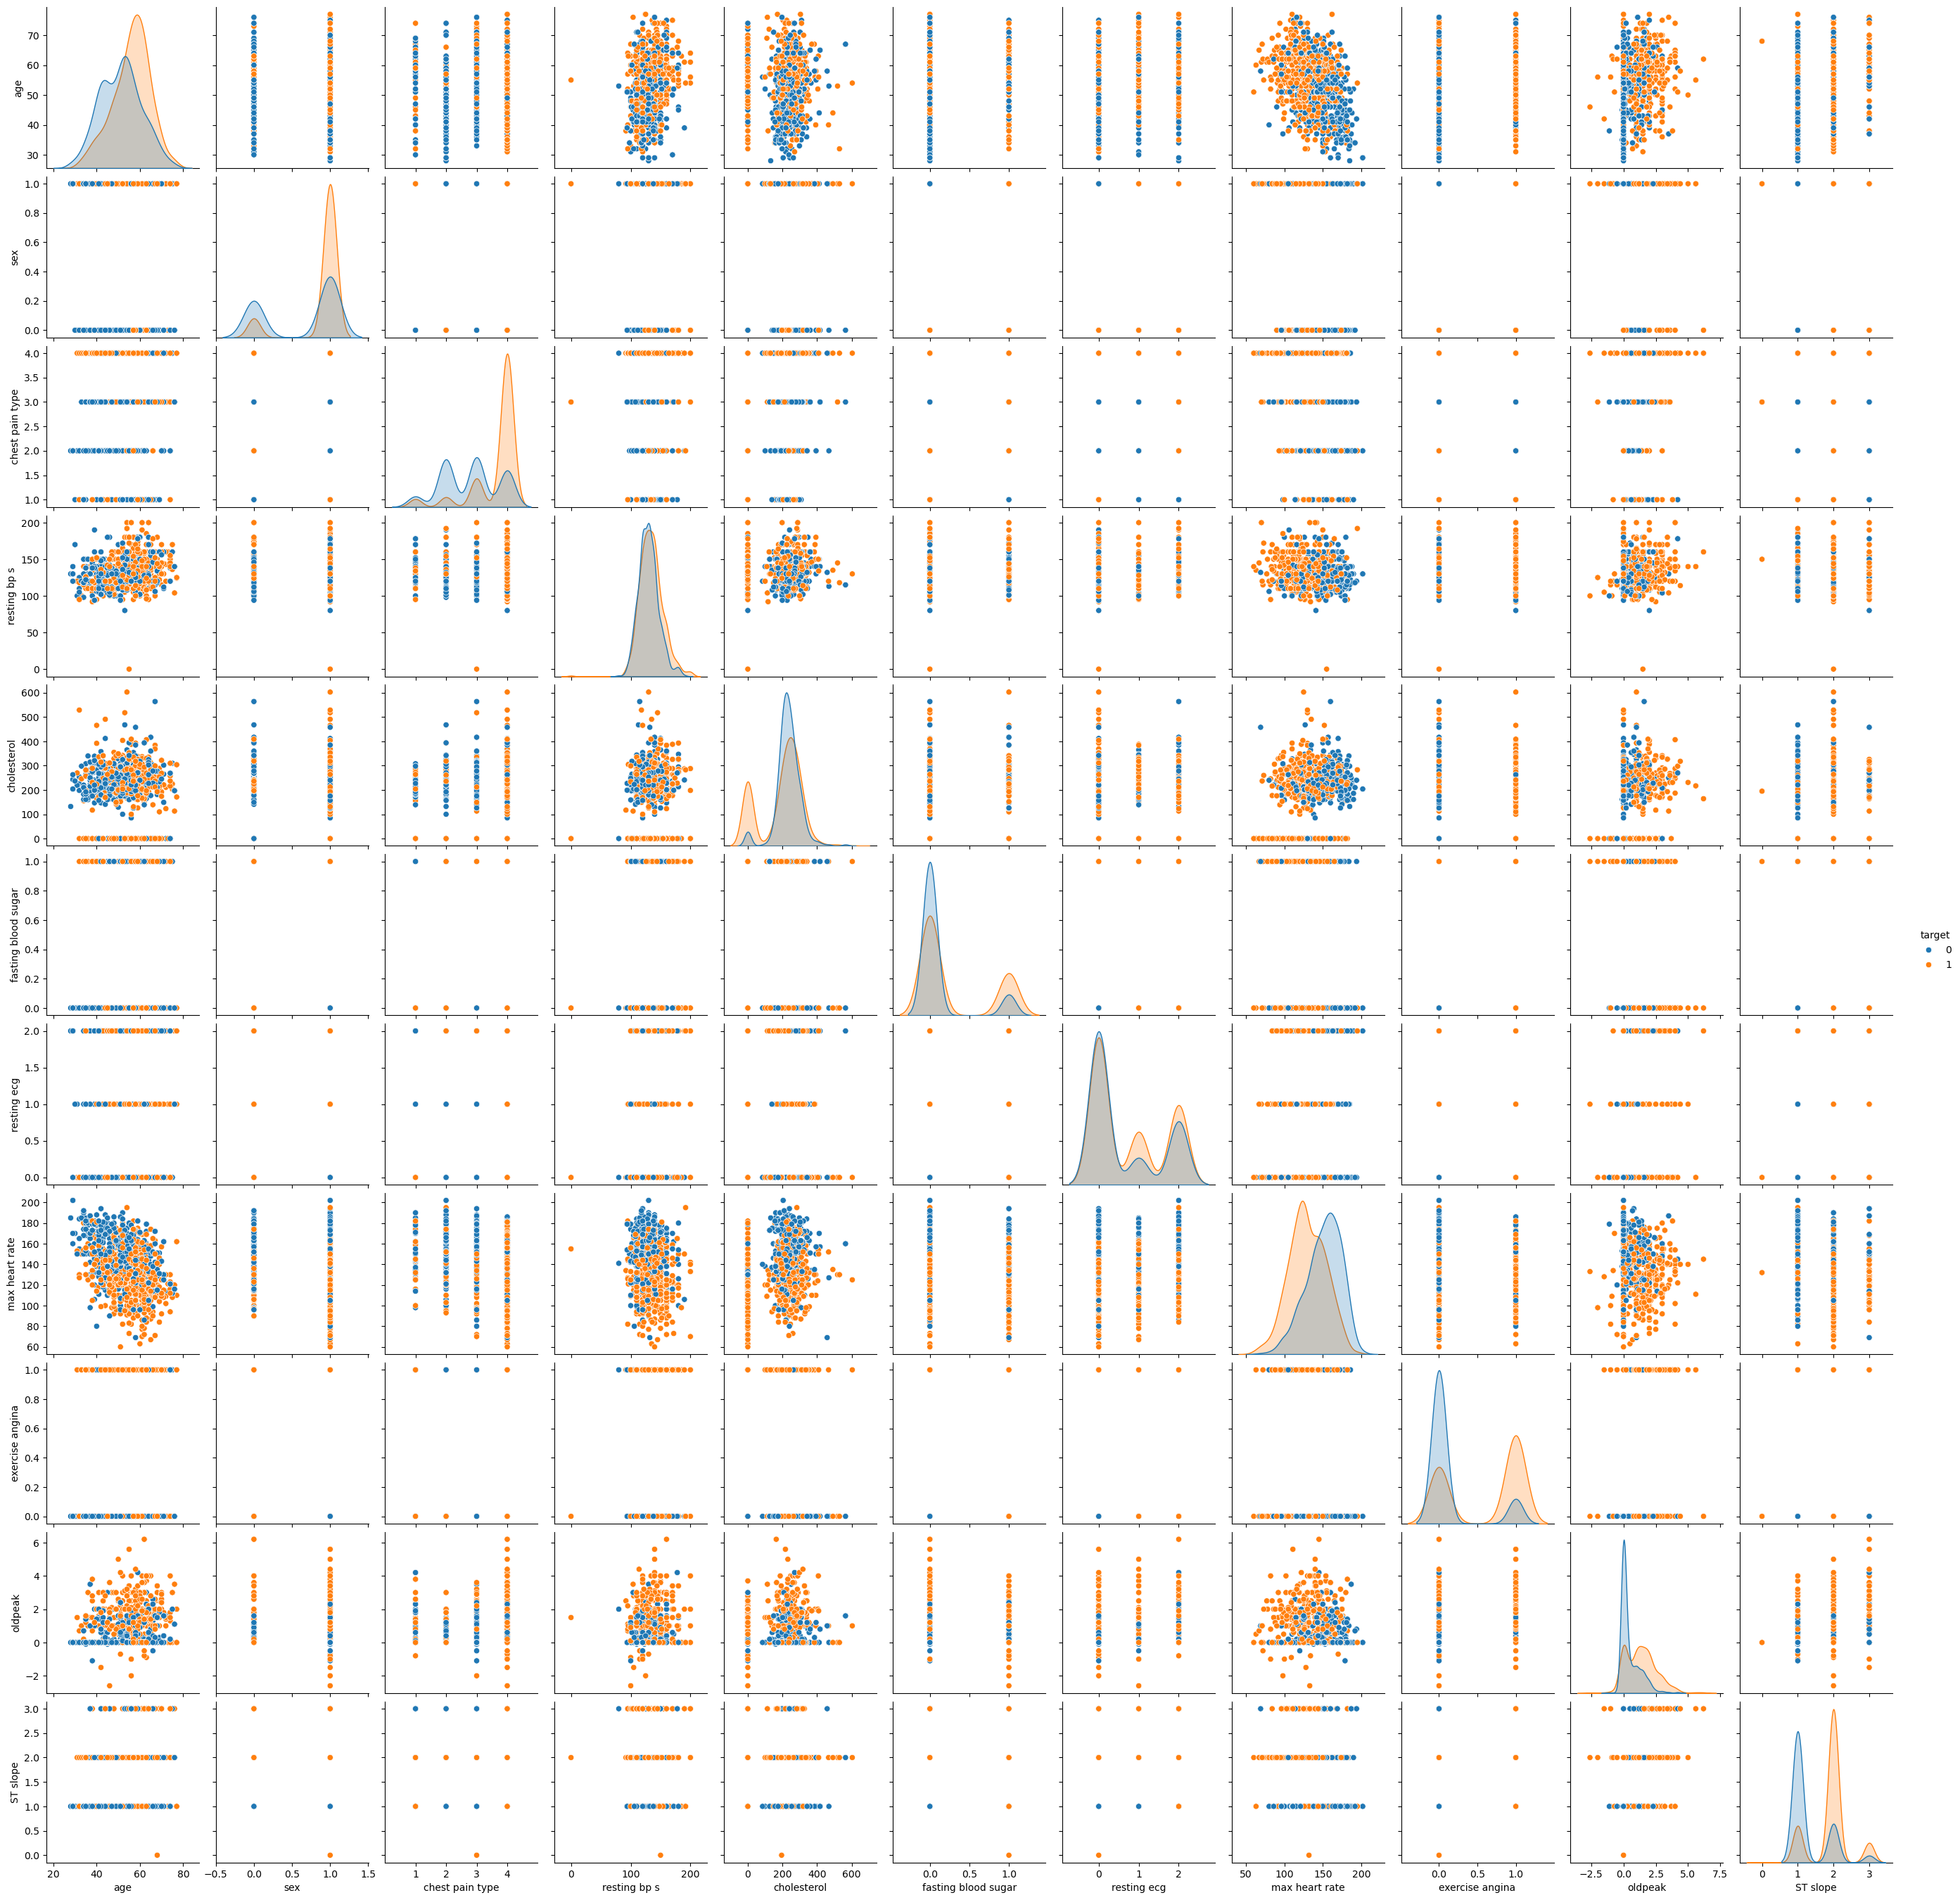

In [58]:
sns.pairplot(df,hue='target')

### Correlation Heatmap

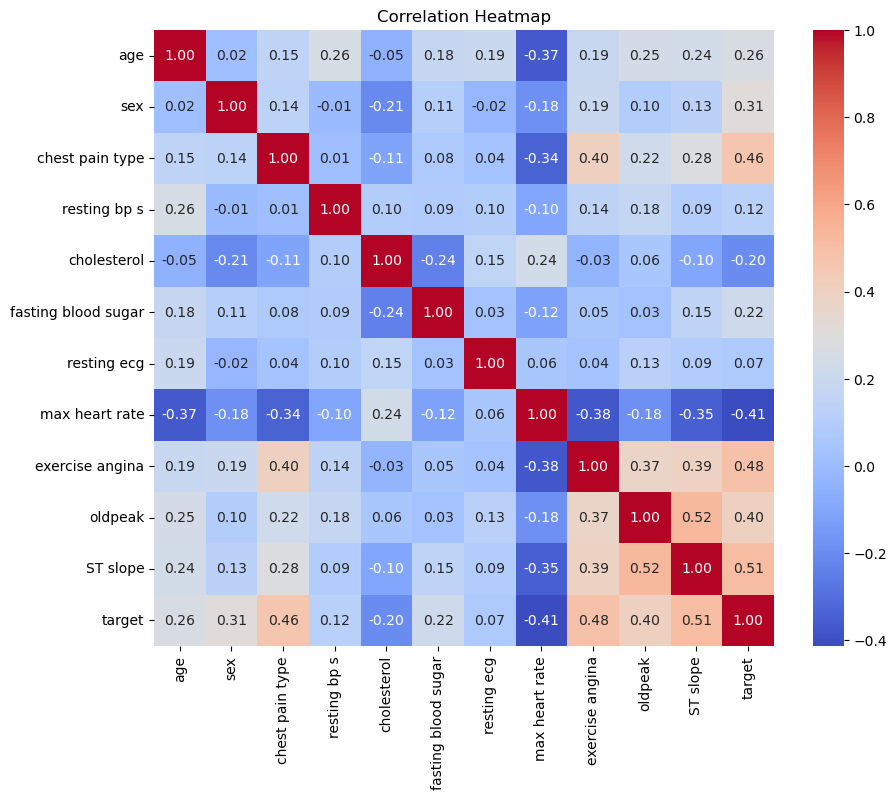

In [31]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Histogram Feature Visualization

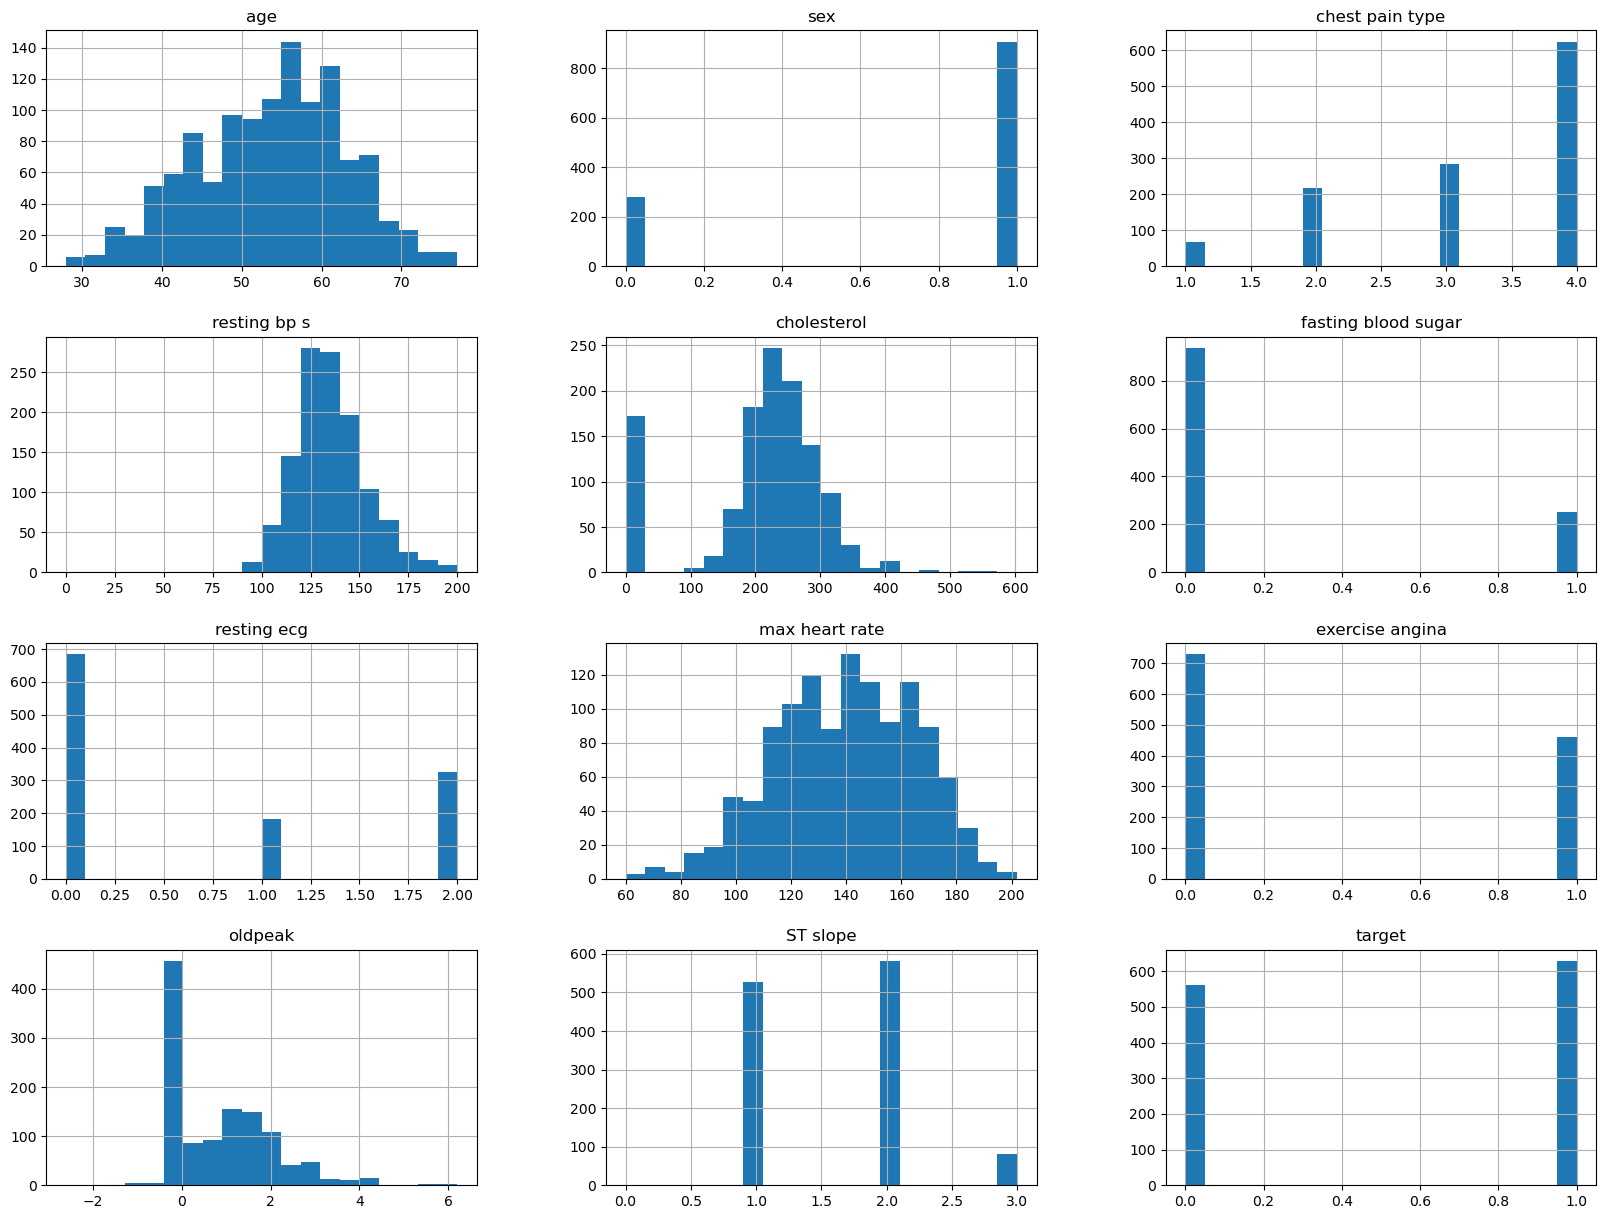

In [38]:
df.hist(bins=20, figsize=(20, 15))
plt.show()

### Boxplot Visualization
Untuk mendeteksi outliers (pada kasus ini outliers diputuskan untuk disimpan)

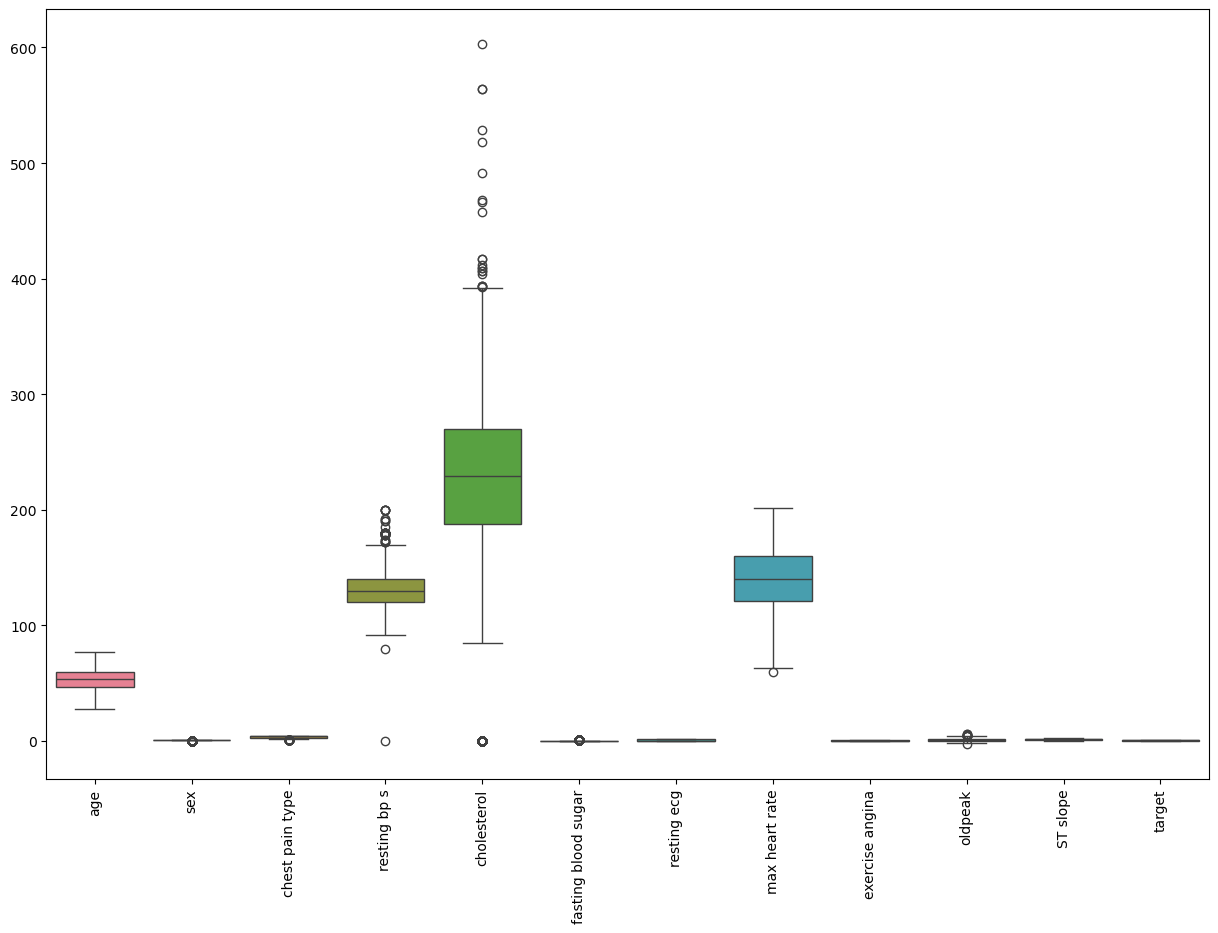

In [50]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

### Target Visualization

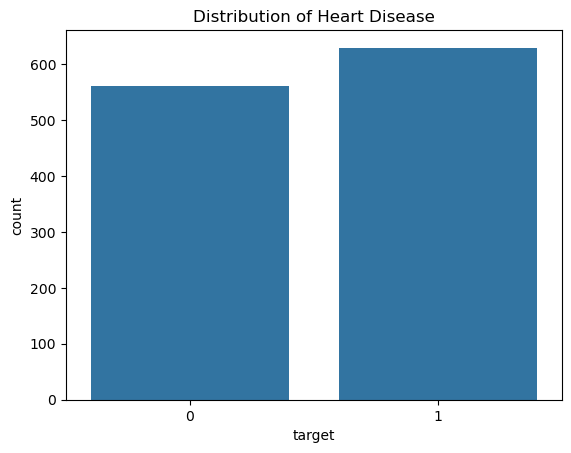

In [45]:
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease')
plt.show()

## Modelling

In [62]:
X = df.drop(columns=['target'])
y = df['target']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    
  
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print("\n")

results_df = pd.DataFrame(results).T
print(results_df)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



Model: Random Forest
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.95      0.96      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       107
           1       0.92      0.93      0.92       131

    accuracy                           0.92       238
   macro avg       0.92      0.91      0.91       2

In [74]:
top_3_models = results_df.sort_values(by='F1 Score', ascending=False).head(3)

print("Top 3 Models based on F1 Score:")
print(top_3_models)

Top 3 Models based on F1 Score:
                        Accuracy  Precision    Recall  F1 Score
Random Forest           0.949580   0.947368  0.961832  0.954545
Gradient Boosting       0.915966   0.917293  0.931298  0.924242
Support Vector Machine  0.890756   0.867133  0.946565  0.905109


In [76]:
import pickle

top_3_models = results_df.sort_values(by='F1 Score', ascending=False).head(3).index

#Save model
for model_name in top_3_models:
    model = models[model_name]
    filename = f"{model_name.replace(' ', '_').lower()}.pkl"

    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"{model_name} saved as {filename}")


Random Forest saved as random_forest.pkl
Gradient Boosting saved as gradient_boosting.pkl
Support Vector Machine saved as support_vector_machine.pkl


## README

The goal of this project is to develop a machine learning model that can predict the presence of heart disease in patients based on various health indicators, such as age, cholesterol levels, blood pressure, and other clinical data. This prediction aims to assist healthcare professionals in identifying high-risk individuals for early intervention. The dataset used includes 1,190 samples with 12 features, covering factors like age, sex, chest pain type, resting blood pressure, cholesterol, maximum heart rate achieved, and more, along with a target variable indicating the presence or absence of heart disease.

The process includes data preprocessing and EDA then modelling 

Models Evaluated:
Logistic Regression
Random Forest Classifier
Gradient Boosting Classifier
Support Vector Machine (SVM)
K-Nearest Neighbors (KNN)

After training and evaluating each model on metrics such as accuracy, precision, recall, and F1 Score, the top 3 performing models were selected based on the F1 Score. These models were saved for potential deployment or further analysis.

Results
The top 3 models demonstrated strong predictive performance with high accuracy and recall, indicating their reliability in identifying heart disease cases in the dataset. The chosen models were then saved for future use.
